# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings

warnings.filterwarnings("ignore")


Bad key savefig.frameon in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

px.set_mapbox_access_token(mapbox_token)

# Import Data

In [3]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [8]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    sfo_data_group_year = sfo_data.groupby("year").mean()

    sfo_data_grp_housing_units = sfo_data_group_year["housing_units"]

    housing_units_per_year = plt.figure(figsize = (20,10))
    plt.bar(sfo_data_grp_housing_units.index, sfo_data_grp_housing_units)
    plt.title("San Francisco - Mean Housing Units", size = 24, c = "Blue")
    plt.xlabel("Year", size = 16)
    plt.ylabel("Housing Units", size = 16)
    plt.ylim(370000,385000)

    plt.close(housing_units_per_year)

    return housing_units_per_year

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    sfo_data_group_year = sfo_data.groupby("year").mean()
    
    sfo_data_sqft_rent = sfo_data_group_year.drop("housing_units", axis = 1)

    average_gross_rent = plt.figure(figsize = (20,10))
    plt.plot(sfo_data_sqft_rent.index, sfo_data_sqft_rent["gross_rent"])
    plt.title("San Francisco - Average Gross Rent", size = 24, c = "Blue")
    plt.xlabel("Year", size = 16)
    plt.ylabel("Average Rent", size = 16)
    plt.xlim(sfo_data_sqft_rent.index.min(), sfo_data_sqft_rent.index.max())
    
    plt.close(average_gross_rent)

    return average_gross_rent

def average_sales_price():
    """Average Sales Price Per Year."""
    
    sfo_data_group_year = sfo_data.groupby("year").mean()
    
    sfo_data_sqft_rent = sfo_data_group_year.drop("housing_units", axis = 1)

    average_sales_price = plt.figure(figsize = (20,10))
    plt.plot(sfo_data_sqft_rent.index, sfo_data_sqft_rent["sale_price_sqr_foot"])
    plt.title("San Francisco - Average Sale Price per Square Foot", size = 24, c = "Blue")
    plt.xlabel("Year", size = 16)
    plt.ylabel("Average Sale Price", size = 16)
    plt.xlim(sfo_data_sqft_rent.index.min(), sfo_data_sqft_rent.index.max())

    plt.close(average_sales_price)

    return average_sales_price

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    sfo_data_2 = sfo_data.reset_index()

    average_price_by_neighborhood = sfo_data_2.hvplot(
        kind = "line",
        x = "year",
        y = "sale_price_sqr_foot",
        groupby = "neighborhood",
        title = "San Francisco - Average Price per Square Foot per Neighborhood",
        xlabel = "Year",
        ylabel = "Price per Sq.Ft"
    )

    return average_price_by_neighborhood

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    sfo_data_2 = sfo_data.reset_index()

    sfo_data_2_neighborhood = sfo_data_2.groupby(["neighborhood"]).mean()
    
    sfo_data_2_neighborhood_top10 = sfo_data_2_neighborhood.sort_values("sale_price_sqr_foot", ascending = False)[0:10].reset_index().drop("year", axis = 1)

    top_most_expensive_neighborhoods = sfo_data_2_neighborhood_top10.hvplot(
        kind = "bar",
        x = "neighborhood",
        y = "sale_price_sqr_foot",
        title = "San Francisco - Top 10 Most Expensive Neighborhoods",
        xlabel = "Neighborhood",
        ylabel = "Price per Sq.Ft",
        rot = 90,
        height = 400,
        ylim = (630,910)
    )

    return top_most_expensive_neighborhoods

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    sfo_data_2 = sfo_data.reset_index()

    sfo_data_2_neighborhood = sfo_data_2.groupby(["neighborhood"]).mean()
    
    sfo_data_2_neighborhood_top10 = sfo_data_2_neighborhood.sort_values("sale_price_sqr_foot", ascending = False)[0:10].reset_index().drop("year", axis = 1)

    parallel_coordinates = px.parallel_coordinates(
        sfo_data_2_neighborhood_top10, 
        color = "sale_price_sqr_foot"
    )

    return parallel_coordinates

def parallel_categories():
    """Parallel Categories Plot."""
    
    sfo_data_2 = sfo_data.reset_index()

    sfo_data_2_neighborhood = sfo_data_2.groupby(["neighborhood"]).mean()
    
    sfo_data_2_neighborhood_top10 = sfo_data_2_neighborhood.sort_values("sale_price_sqr_foot", ascending = False)[0:10].reset_index().drop("year", axis = 1)
    
    parallel_categories = px.parallel_categories(
        sfo_data_2_neighborhood_top10, 
        color = "sale_price_sqr_foot"
    )

    return parallel_categories

def neighborhood_map():
    """Neighborhood Map"""
    
    sfo_data_2 = sfo_data.reset_index()
    
    sfo_data_2_neighborhood = sfo_data_2.groupby(["neighborhood"]).mean()

    sfo_data_3 = sfo_data_2_neighborhood.drop("year", axis = 1).reset_index()
    
    joined_df = pd.concat([df_neighborhood_locations, sfo_data_3], axis = "columns", join = "inner").drop("neighborhood", axis = 1)
    
    neighborhood_map = px.scatter_mapbox(
        joined_df,
        lat = "Lat",
        lon = "Lon",
        size = "sale_price_sqr_foot",
        color = "gross_rent",
        mapbox_style = "basic",
        zoom = 11,
        title = "San Francisco - Avg. Price per Sq.Ft and Gross Rent"
    )

    return neighborhood_map


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

In [12]:
welcome_dash = "# Invest in San Fran!"

pretty_plot_descript = "This interactive map shows the average sale price per sq.ft and the gross rents in the San Fran Neighborhoods"

averages = "## These are the yearly averages for the San Fran market"

top_10_descript = "## Here are the Averages per Neighborhood and the Most Expensive Neighborhoods"

relationships = "## These can be used to infer realtionships"

intro_tab = pn.Column(welcome_dash, pretty_plot_descript, neighborhood_map)

tab2 = pn.Column(averages, housing_units_per_year, average_gross_rent, average_sales_price)

tab3 = pn.Column(top_10_descript, average_price_by_neighborhood, top_most_expensive_neighborhoods)

tab4 = pn.Column(relationships, parallel_categories, parallel_coordinates)

panel = pn.Tabs(
    ("Into", intro_tab),
    ("Averages", tab2),
    ("Top 10", tab3),
    ("Research", tab4)
)

## Serve the Panel Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive02302')
    [1] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive02311')
        [2] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive02317')
        [3] Column
            [0] Column()
            [1] Row
                [0] Matplotlib(Figure, name='interactive02323')
    [2] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Row(name='interactive02332')
                    [0] HoloViews(DynamicMap, name='interactive02332')
                    [1] Column
                        [0] WidgetBox
                            [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                        [1] VSpacer()
        [2] Column
            [0] Column()
            [1] Row
                [0] HoloViews(Bars, name='interactive02370')
    [3] Column
        [0] Markdown(str)
        [1] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive02458')
        [2] Column
            [0] Column()
            [1] Row
                [0] Plotly(Figure, name='interactive02464')
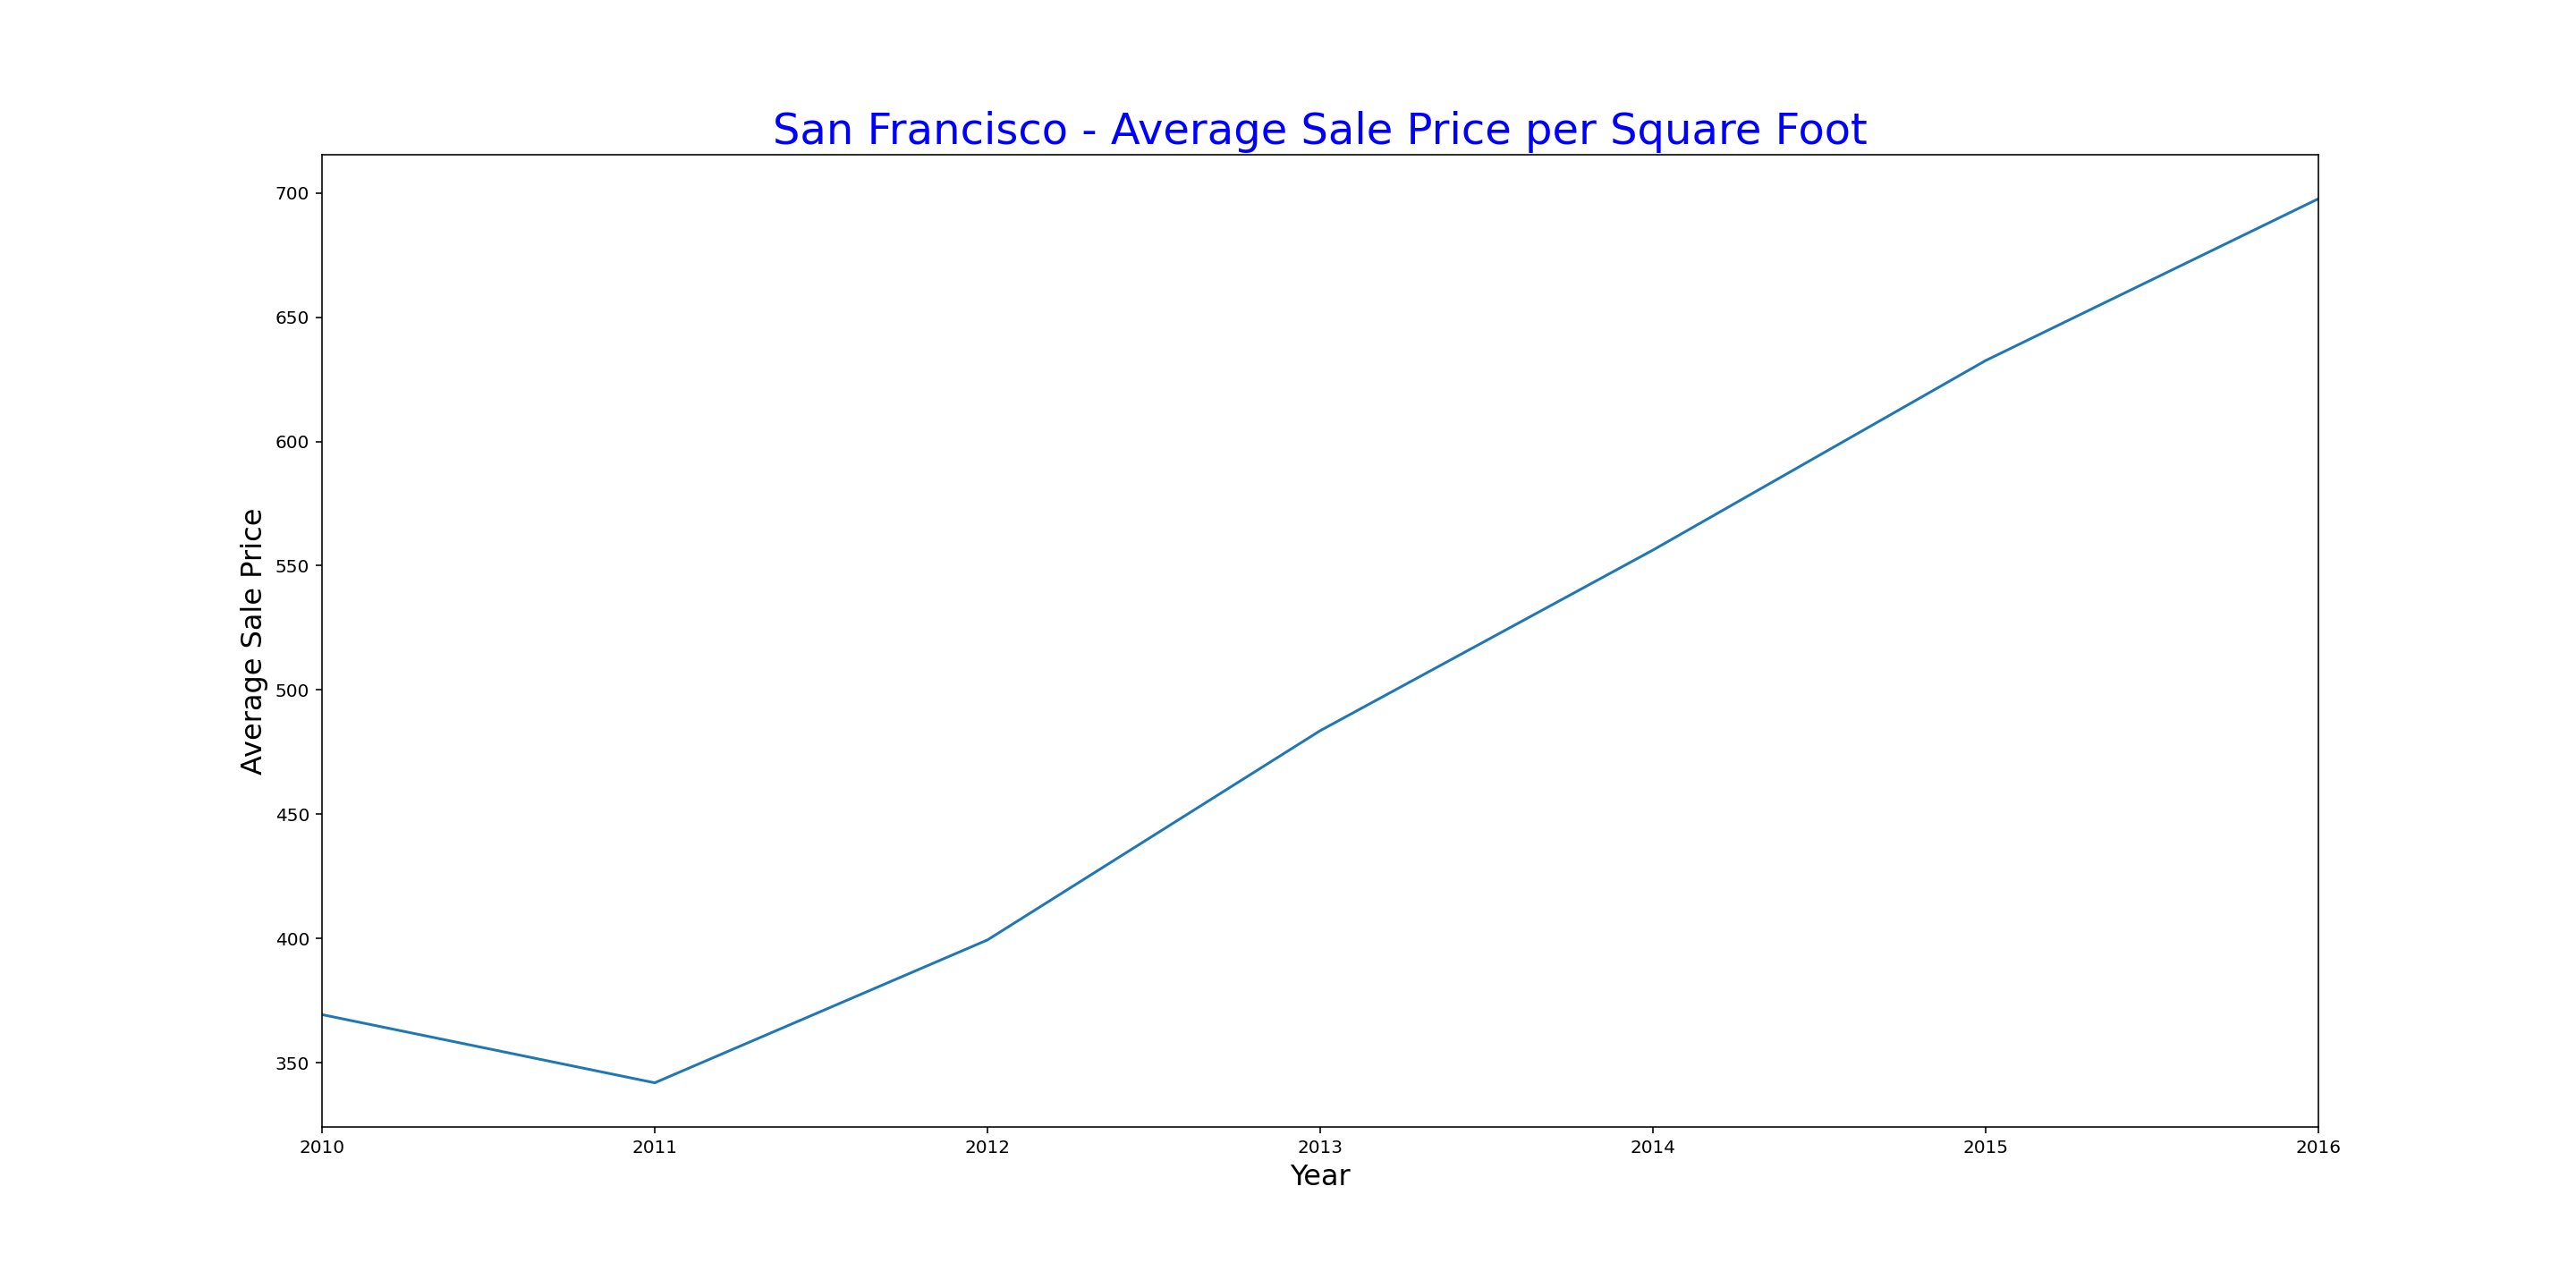
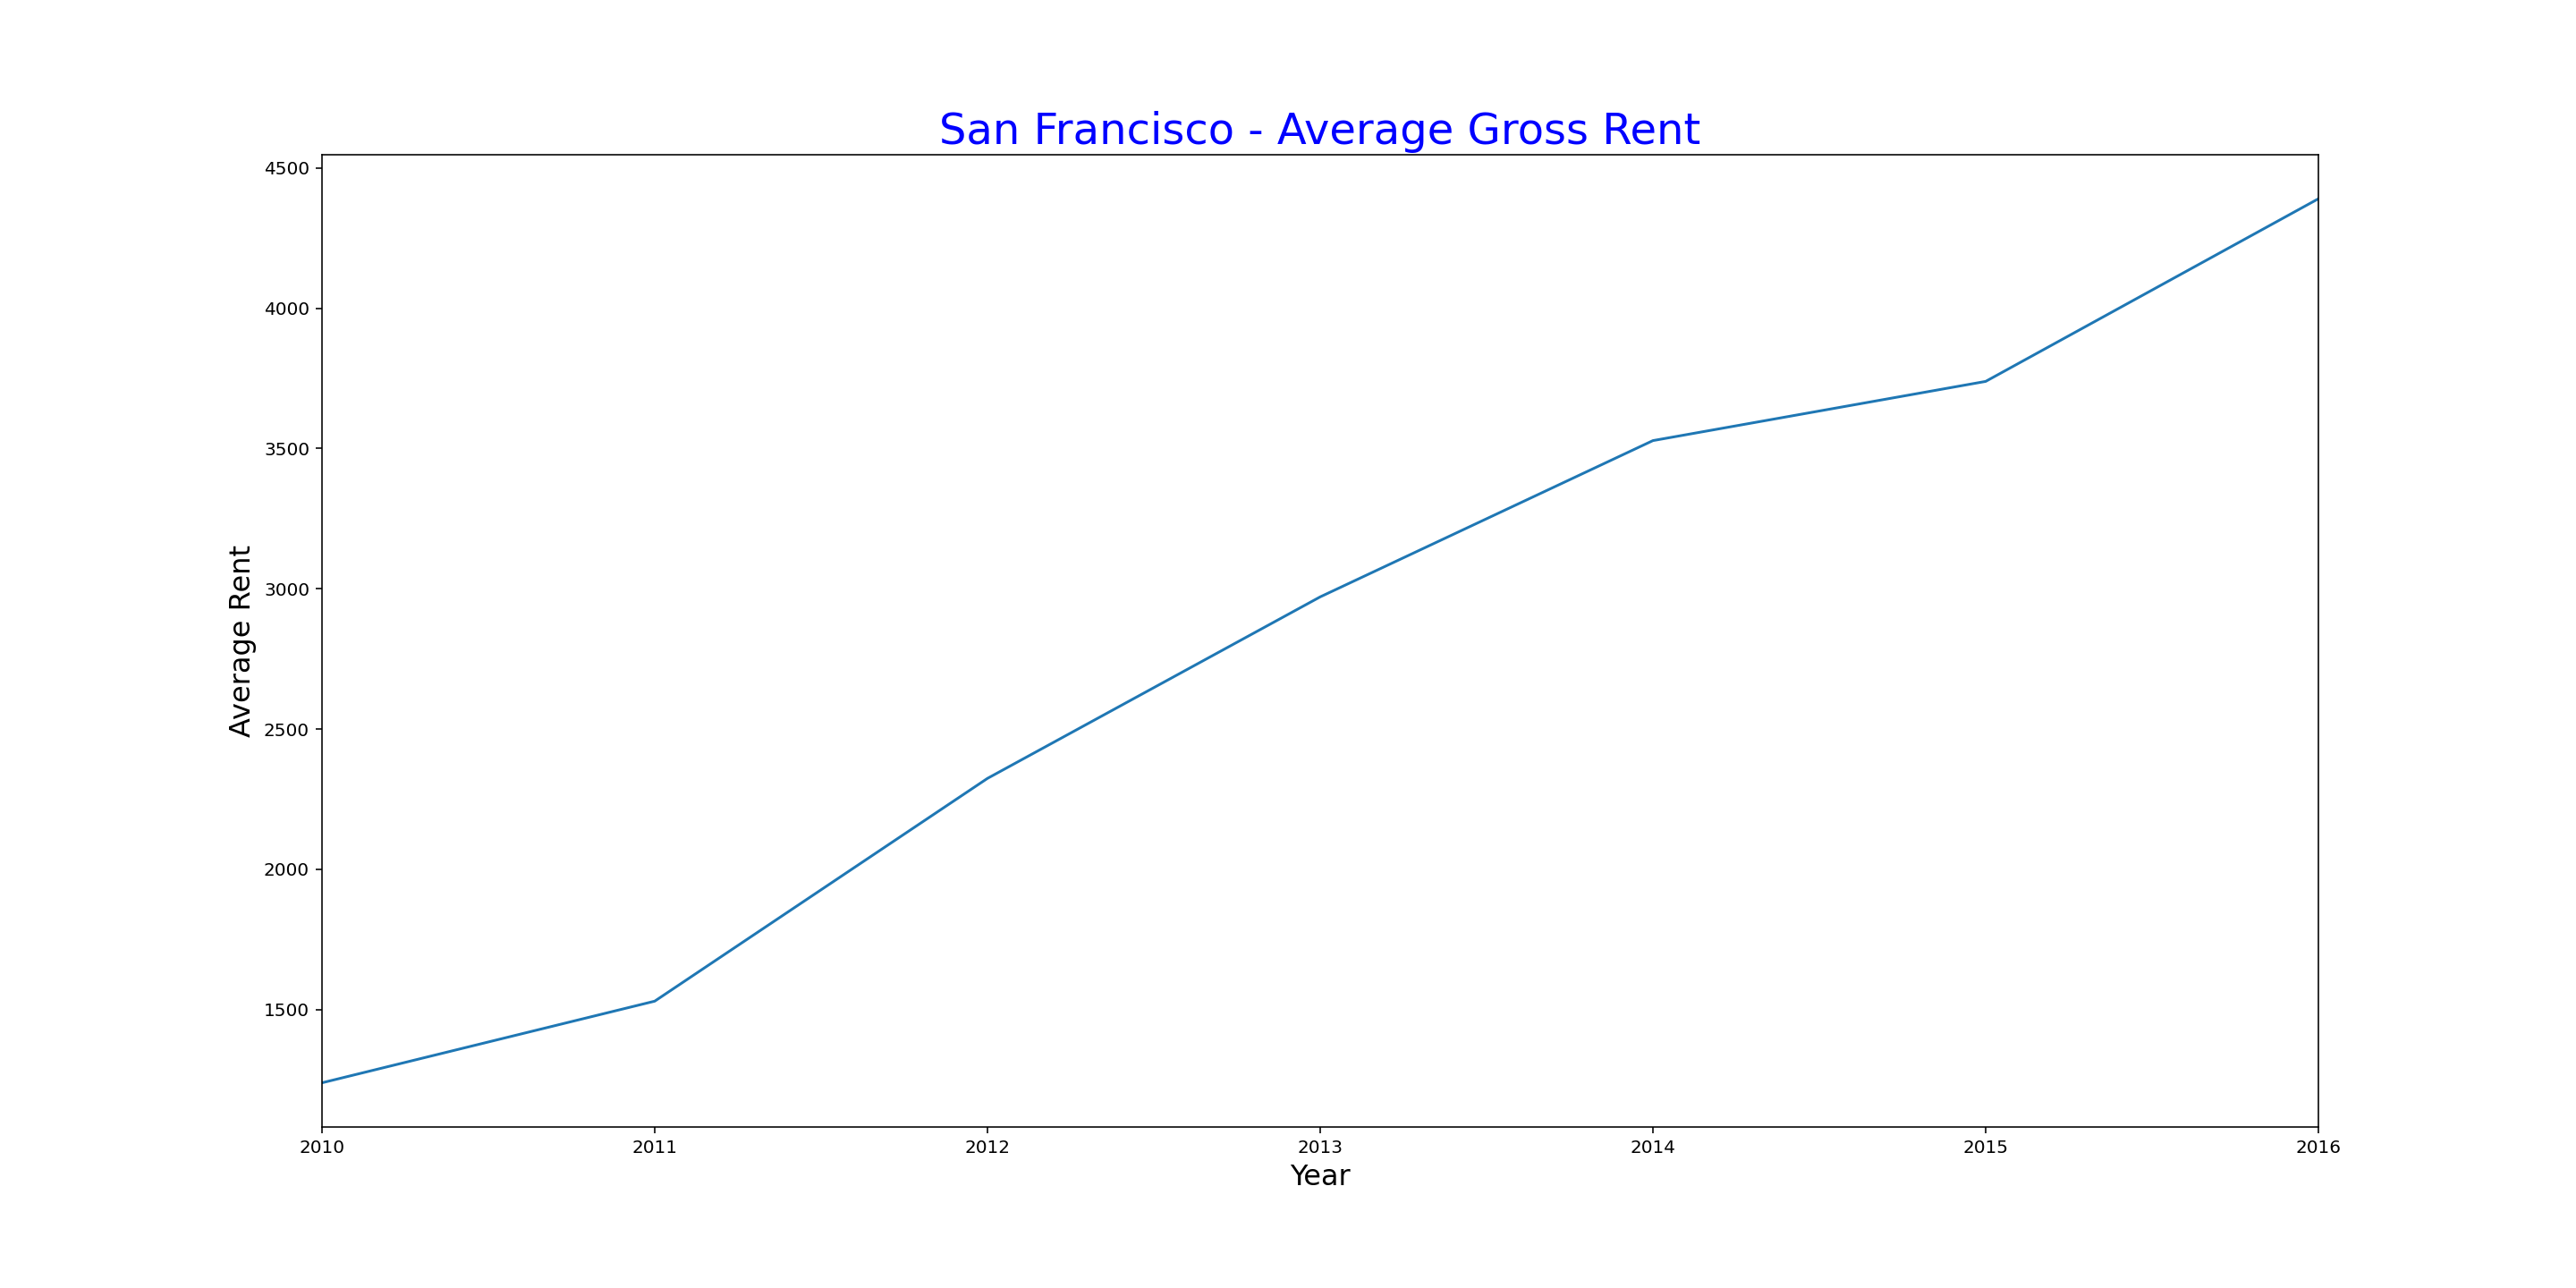
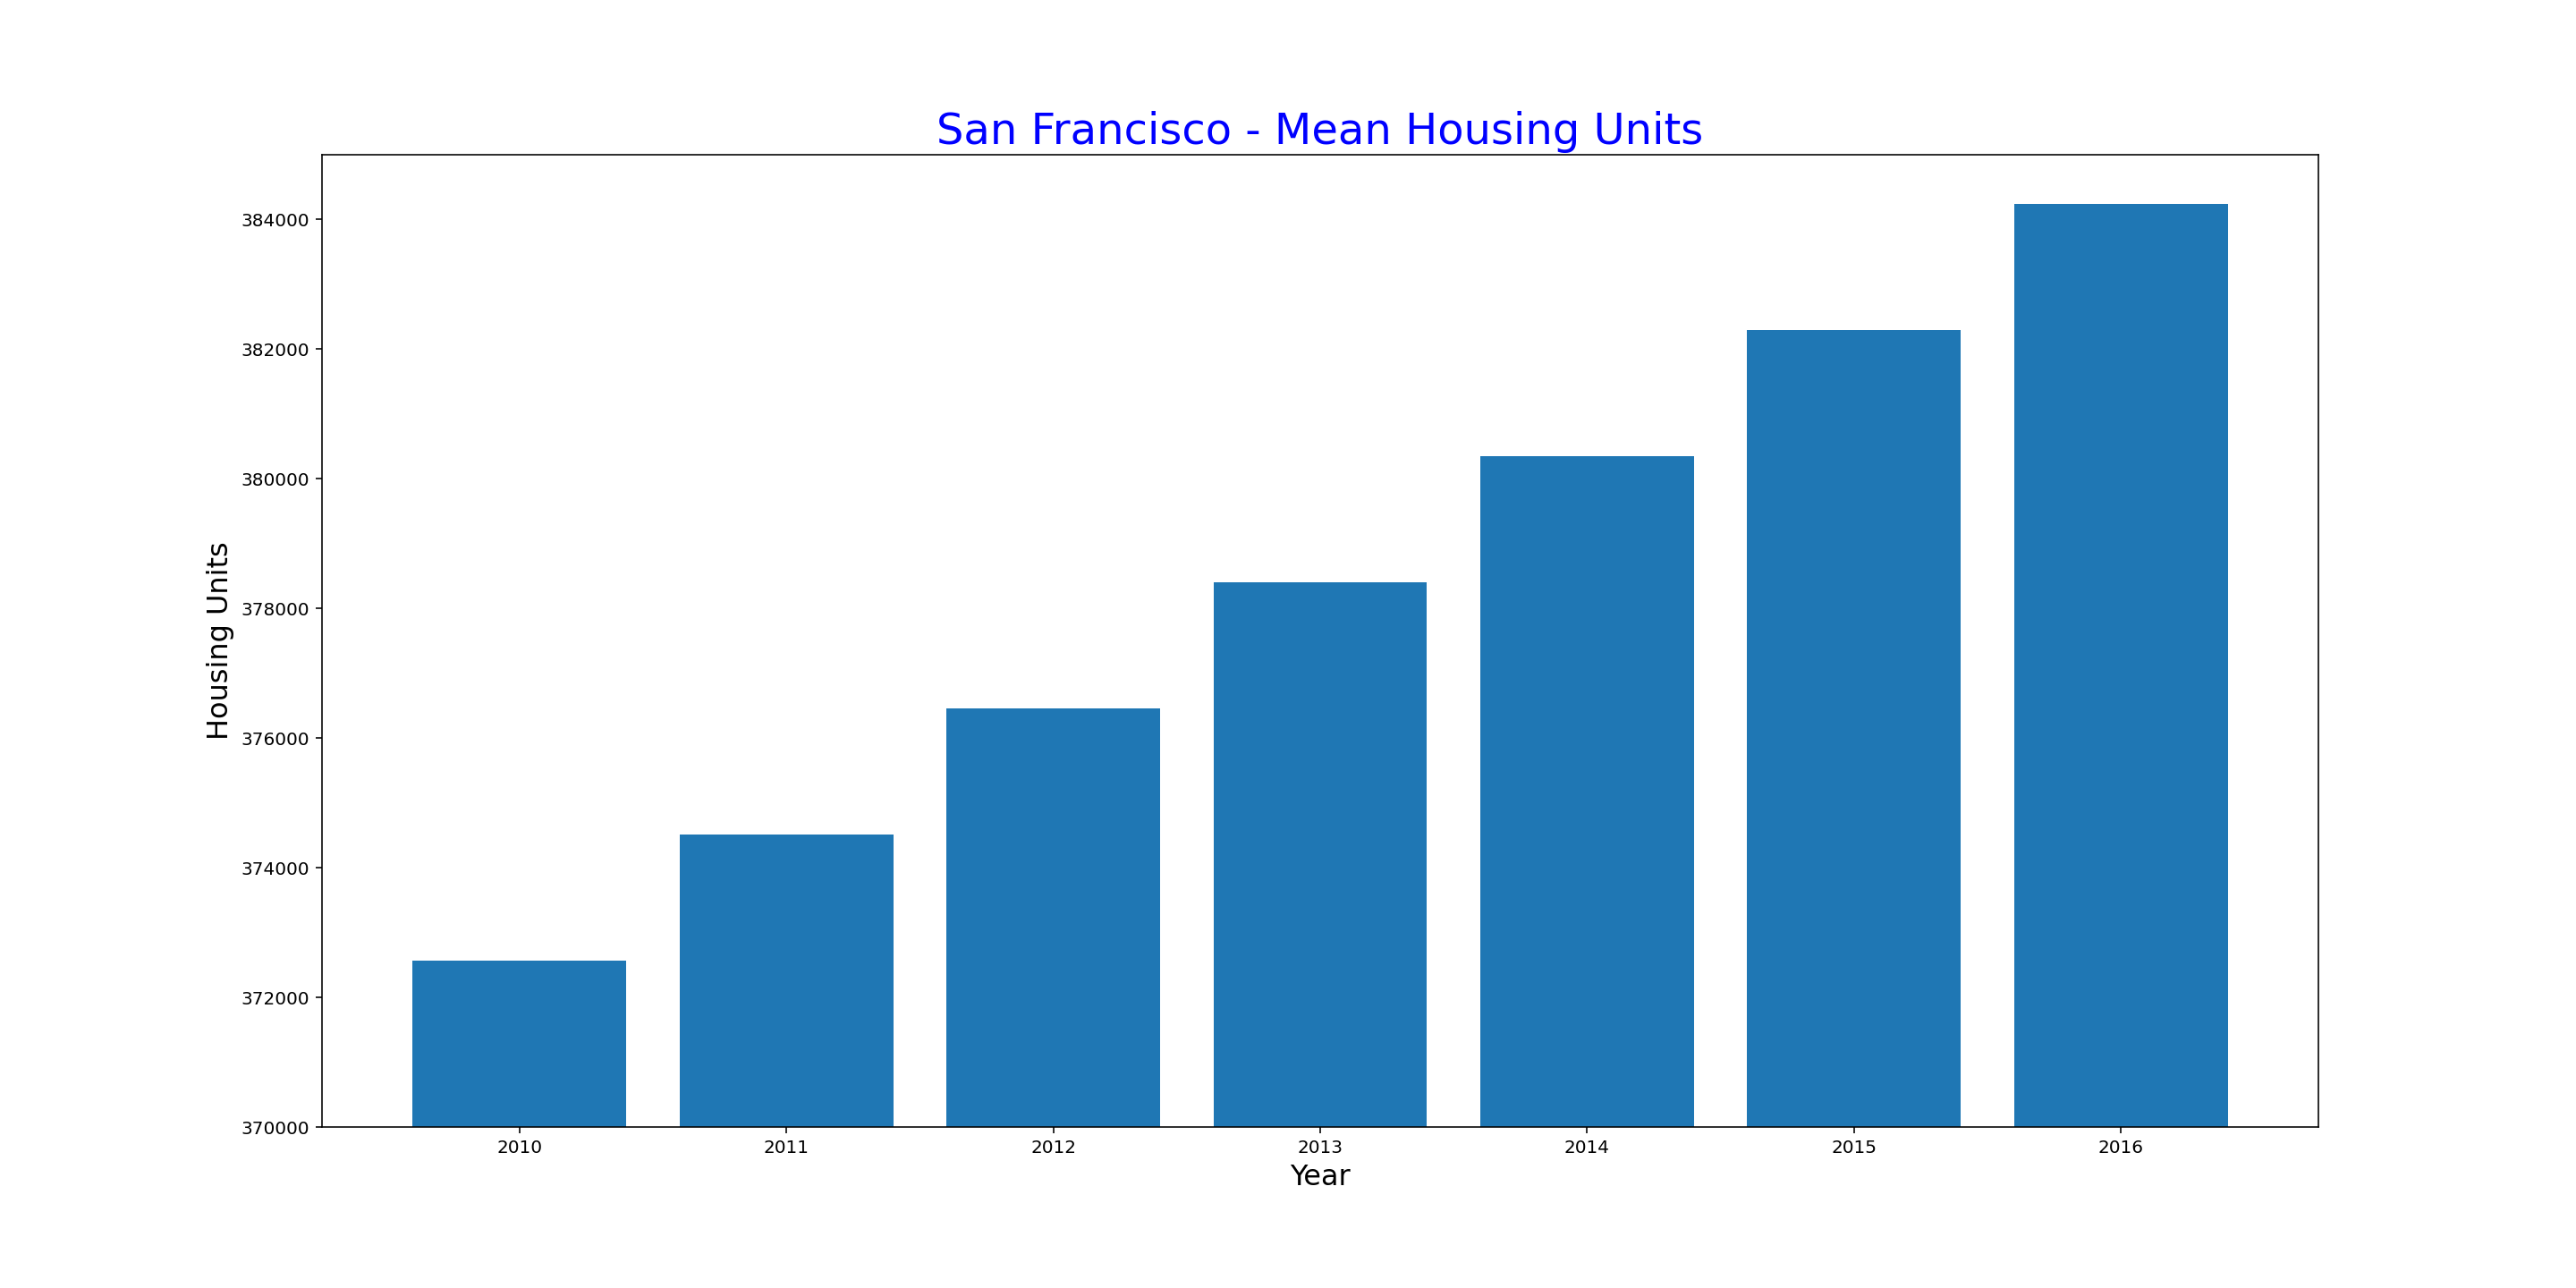

In [13]:
panel.servable()